In [1]:
import graph_tool as gt
import graph_tool.topology as top
import networkx as nx
import numpy as np
import torch

import sys
sys.path.append('./../..')

from data.utils import get_rings
from data.data_loading import load_graph_dataset

In [2]:
k = 6
pattern = nx.cycle_graph(k)
edge_list = list(pattern.edges)

graph = nx.Graph()
nx.add_cycle(graph, range(0, 4))
nx.add_star(graph, range(4-1, 7))
nx.add_cycle(graph, [7-1, 7, 11, 22, 33, 44])
nx.add_cycle(graph, [33, 55, 66, 77, 88, 44])
graph_edge_list = list(graph.edges)

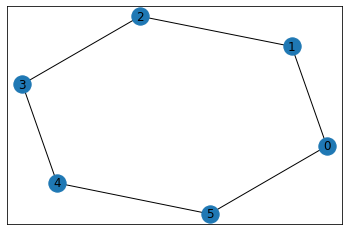

In [3]:
nx.draw_networkx(pattern, with_labels=True)

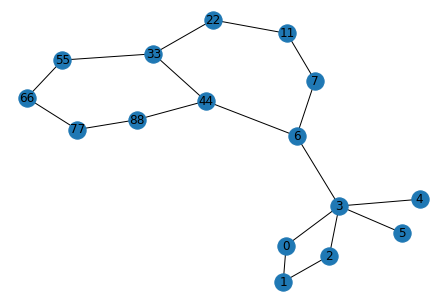

In [4]:
nx.draw(graph, with_labels=True)

In [5]:
get_rings(torch.LongTensor(graph_edge_list).t())

[(33, 44, 88, 77, 66, 55), (0, 1, 2, 3), (6, 7, 11, 22, 33, 44)]

In [9]:
def plot_ring_stats(dataset):
    keys = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    ring_cards = {key: list() for key in keys}
    for graph in dataset:
        rings = get_rings(graph.edge_index)
        rings_per_graph = {key: 0 for key in keys}
        for ring in rings:
            k = len(ring)
            rings_per_graph[k] += 1
        for k in keys:
            ring_cards[k].append(rings_per_graph[k])
    for k in ring_cards:
        print(k, '{:.3f}'.format(np.mean(ring_cards[k])), np.median(ring_cards[k]))

In [10]:
for name in ['PTC', 'MUTAG', 'NCI1', 'PROTEINS']:
    print('----==== {} ====----'.format(name))
    try:
        dataset = load_graph_dataset(name)
        plot_ring_stats(dataset[0])
    except NotImplementedError:
        print('Dataset {} not available.'.format(name))

----==== PTC ====----
3 0.044 0.0
4 0.017 0.0
5 0.209 0.0
6 1.186 1.0
7 0.015 0.0
8 0.000 0.0
9 0.000 0.0
10 0.000 0.0
11 0.000 0.0
12 0.000 0.0
----==== MUTAG ====----
3 0.000 0.0
4 0.000 0.0
5 0.362 0.0
6 2.500 2.0
7 0.000 0.0
8 0.000 0.0
9 0.000 0.0
10 0.000 0.0
11 0.000 0.0
12 0.000 0.0
----==== NCI1 ====----
3 0.045 0.0
4 0.035 0.0
5 0.751 0.0
6 2.664 3.0
7 0.109 0.0
8 0.000 0.0
9 0.000 0.0
10 0.000 0.0
11 0.000 0.0
12 0.000 0.0
----==== PROTEINS ====----
3 27.404 21.0
4 14.080 4.0
5 5.686 0.0
6 8.723 0.0
7 5.396 0.0
8 0.000 0.0
9 0.000 0.0
10 0.000 0.0
11 0.000 0.0
12 0.000 0.0
